# Lyrics Generation with Deep Learning

In this notebook we will use the dataset: [Taylor Swift Song Lyrics from all the albums](https://www.kaggle.com/PromptCloudHQ/taylor-swift-song-lyrics-from-all-the-albums) from Kaggle.

And will try to generate new lines of lyrics with a few words as a jumpstart.


In [24]:
# This data is stored in my drive and link has been used here.
# Feel free to download or use this raw link directly as well

data = 'https://raw.githubusercontent.com/aravind-naidu/Lyrics-Generator/main/taylor_swift_lyrics.csv'

# Importing Libraries

In [25]:
import pandas as pd
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku 

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.regularizers import Regularizer

import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset
I faced some encoding errors while importing data without the "encoding" type perameter. 

And had to use 'unicode_escape'.

In [26]:
df = pd.read_csv(data, encoding= 'unicode_escape')
df.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


# Knowing the dataset more...

In [27]:
df.shape

(4862, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       4862 non-null   object
 1   album        4862 non-null   object
 2   track_title  4862 non-null   object
 3   track_n      4862 non-null   int64 
 4   lyric        4862 non-null   object
 5   line         4862 non-null   int64 
 6   year         4862 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 266.0+ KB


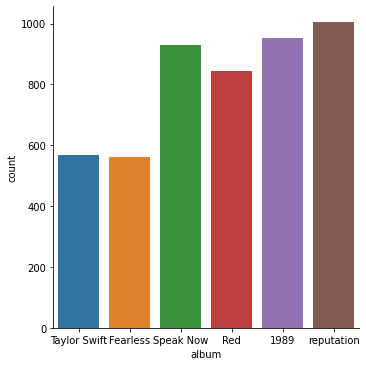

In [29]:
sns.catplot(x="album",data=df,kind="count")

In [30]:
df['track_title'].nunique()

94

In [31]:
df['track_n'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

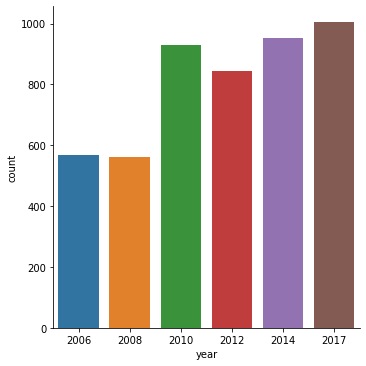

In [32]:
sns.catplot(x="year",data=df,kind="count")

# Making a Corpus
Making use of the column with lyrics and making a corpus of all the lines.

In [33]:
corpus = []
for line in df['lyric']:
  lowered_line = line.lower()
  corpus.append(lowered_line)

In [34]:
corpus[:20]

['he said the way my blue eyes shined',
 'put those georgia stars to shame that night',
 'i said, "that\'s a lie"',
 'just a boy in a chevy truck',
 "that had a tendency of gettin' stuck",
 'on backroads at night',
 'and i was right there beside him all summer long',
 'and then the time we woke up to find that summer gone',
 'but when you think tim mcgraw',
 'i hope you think my favorite song',
 'the one we danced to all night long',
 'the moon like a spotlight on the lake',
 'when you think happiness',
 'i hope you think that little black dress',
 'think of my head on your chest',
 'and my old faded blue jeans',
 'when you think tim mcgraw',
 'i hope you think of me',
 'september saw a month of tears',
 "and thankin' god that you weren't here"]

# Data Cleaning

In [35]:
tok = Tokenizer()

tok.fit_on_texts(corpus)
total_words = len(tok.word_index) + 1

In [36]:
seq = []
for line in corpus:
    token_list = tok.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        seq.append(n_gram_sequence)

In [37]:
max_sequence_len = max([len(x) for x in seq])
seq = np.array(pad_sequences(seq, maxlen=max_sequence_len, padding='pre'))

In [38]:
predictors, label = seq[:,:-1],seq[:,-1]

In [39]:
label = ku.to_categorical(label, num_classes=total_words)

In [40]:
print("Size of Input Sequences", seq.shape[1])

Size of Input Sequences 18


# Making a Model
We are using a Embedding layer with Bidirectional LSTM and LSTM.

We also add, Dropout layer and output layers. And use Adam Optimizer.

In [41]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))  
model.add(Bidirectional(LSTM(150, return_sequences=True)))  
model.add(Dropout(0.2))  
model.add(LSTM(100))  
model.add(Dense(total_words/2, activation='relu'))  
model.add(Dense(total_words, activation='softmax'))  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 17, 50)            120400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 17, 300)           241200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1204)              121604    
_________________________________________________________________
dense_3 (Dense)              (None, 2408)              2901640   
Total params: 3,545,244
Trainable params: 3,545,244
Non-trainable params: 0
____________________________________________

In [42]:
hist = model.fit(predictors, label, epochs= 100, verbose=1)

Epoch 1/100
957/957 [==============================] - 60s 28ms/step - loss: 6.1463 - accuracy: 0.0496
Epoch 2/100
957/957 [==============================] - 27s 28ms/step - loss: 5.3330 - accuracy: 0.0702
Epoch 3/100
957/957 [==============================] - 27s 28ms/step - loss: 4.9708 - accuracy: 0.0985
Epoch 4/100
957/957 [==============================] - 27s 28ms/step - loss: 4.6442 - accuracy: 0.1274
Epoch 5/100
957/957 [==============================] - 27s 28ms/step - loss: 4.3698 - accuracy: 0.1558
Epoch 6/100
957/957 [==============================] - 27s 28ms/step - loss: 4.1250 - accuracy: 0.1835
Epoch 7/100
957/957 [==============================] - 27s 28ms/step - loss: 3.8661 - accuracy: 0.2074
Epoch 8/100
957/957 [==============================] - 27s 28ms/step - loss: 3.6563 - accuracy: 0.2328
Epoch 9/100
957/957 [==============================] - 27s 28ms/step - loss: 3.4578 - accuracy: 0.2629
Epoch 10/100
957/957 [==============================] - 27s 28ms/step - l

# Plotting Results
Graphs of:
* Accuracy 
* Loss

In [43]:
import matplotlib.pyplot as plt

def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

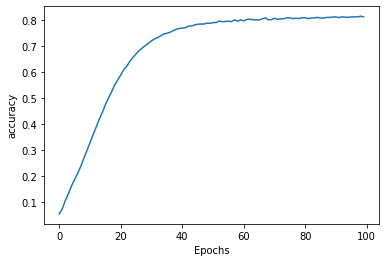

In [44]:
plot_graph(hist,'accuracy')

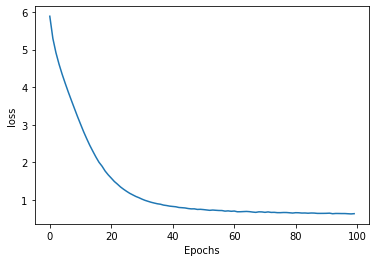

In [45]:
plot_graph(hist,'loss')

# Generating Lyrics
From the trained model we will now generate the lyrics.

We would need to pass a word(s) and the total size of expected prediction in the **gen_lyrics()** function.

In [46]:
def gen_lyrics(seed_text, total_words):
    for _ in range(total_words-1):
        token_list = tok.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tok.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    print(seed_text)

In [47]:
gen_lyrics("Hello",10)

Hello to a redhead named abigail covers flying in your


In [48]:
gen_lyrics("Singing",10)

Singing long live all the mountains we moved down you


In [49]:
gen_lyrics("Singing Alone",15)

Singing Alone yeah we can shake shake you cab to go and i did too gonna


In [50]:
gen_lyrics("I am going to",12)

I am going to see you back at my front door trying to block you


In [51]:
gen_lyrics("Marry me Juliet",12)

Marry me Juliet like i don't know you do i don't think you do


In [52]:
gen_lyrics("He said the",12)

He said the way my blue eyes shine from my mind i tried to


In [53]:
gen_lyrics("Georgia stars",12)

Georgia stars to lose your girl at you do like we're jaguars if


# Future Vision

This is a very basic approach to start with, we can add more data to increase the prediction quality. Moreover, we can use some different architecture and work more intensively as well.

I did this project as a 'Weekend Skills Brush-up". I will be trying to push this ahead someday later.

Feel free to reproduce and make it better. Also, do let me know about it.


# Ways to reach me: 

<p align="left">
<a href="www.linkedin.com/in/aravind-naidu" target="blank"><img align="center" src="https://cdn.jsdelivr.net/npm/simple-icons@3.0.1/icons/linkedin.svg" alt="aravindnaidulinkedin" height="40" width="40" /></a>
<a href="https://www.instagram.com/aravind.naidu/" target="blank"><img align="center" src="https://cdn.jsdelivr.net/npm/simple-icons@3.0.1/icons/instagram.svg" alt="aravindnaiduinstagram" height="40" width="40" /></a>
<a href="https://medium.com/@aravind.ai" target="blank"><img align="center" src="https://cdn.jsdelivr.net/npm/simple-icons@3.0.1/icons/medium.svg" alt="aravindnaidumedium" height="40" width="40" /></a>
<a href="https://twitter.com/aravind_ml" target="blank"><img align="center" src="https://cdn.jsdelivr.net/npm/simple-icons@3.0.1/icons/twitter.svg" alt="aravindnaidutwitter" height="40" width="40" /></a>
</p>
